In [94]:
'''
Nama : Rifqi Novandi
Project : Proyek Akhir Klasifikasi Gambar
'''

'\nNama : Rifqi Novandi\nProject : Proyek Akhir Klasifikasi Gambar\n'

In [72]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O '/tmp/rockpaperscissors.zip'

--2021-07-12 08:44:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.98MB/s    in 57s     

2021-07-12 08:45:57 (5.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [73]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [74]:
import os

base_dir = '/tmp/rockpaperscissors'
os.listdir(base_dir)

['rock', 'paper', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']

In [75]:
train_dir = os.path.join(base_dir, 'rps-cv-images')
os.listdir(train_dir)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [76]:
validation_dir = os.path.join(base_dir, 'rps-cv-images')
os.listdir(validation_dir)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [77]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0,
    fill_mode='wrap',
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.4
)

validation_datagen = ImageDataGenerator(
    rotation_range=0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0,
    fill_mode='wrap',
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.4
)

In [79]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                        target_size=(150, 150),
                                        color_mode='rgb',
                                        classes=None,
                                        class_mode='categorical',
                                        batch_size=8,
                                        shuffle=True,
                                        seed=None,
                                        subset='training'
                                        )

validation_gen = validation_datagen.flow_from_directory(validation_dir,
                                        target_size=(150, 150),
                                        color_mode='rgb',
                                        classes=None,
                                        class_mode='categorical',
                                        batch_size=8,
                                        shuffle=True,
                                        seed=None,
                                        subset='validation'
                                        )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [80]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [90]:
from tensorflow.keras.callbacks import Callback

class MyCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
     if(logs.get('accuracy')>0.96 and logs.get('val_accuracy')>0.96):
       print("\nModel achieved 96% of Accuracy")
       self.model.stop_training=True

callbacks = MyCallback()

In [91]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              metrics='accuracy',
              run_eagerly=None,
              optimizer='RMSprop'
)

In [92]:
model.fit(
    train_gen,
    batch_size=16,
    epochs=20,
    validation_data=validation_gen,
    validation_steps=5,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/20
165/165 - 32s - loss: 0.0634 - accuracy: 0.9871 - val_loss: 0.3085 - val_accuracy: 0.9500
Epoch 2/20
165/165 - 31s - loss: 0.0427 - accuracy: 0.9909 - val_loss: 4.8254e-04 - val_accuracy: 1.0000

Model achieved 96% of Accuracy


Saving 2PiUTczN5Ez4VreF.png to 2PiUTczN5Ez4VreF.png
2PiUTczN5Ez4VreF.png
paper


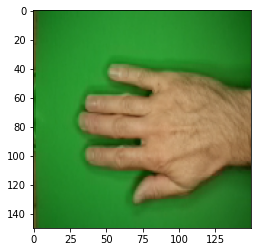

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')